<a href="https://colab.research.google.com/github/0011Ashwin/Google-Colab-Work/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Deep learning ANN implementation



In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
## import some basics librarise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide the dataset into independent and dependent feature
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
## Ferature engineering
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [ ]:
## concatenate these variables with dataframe
X = X.drop(['Geography' , 'Gender'], axis=1)

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
# Splitting the dataset into Training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
## feature scaling very import in ANN
## gradient decent required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Now let create ANN
## In 2nd line we use some activitvation function such as ReLU , PReLU, Dropout
from tensorflow.keras.models import Sequential
## Whenever we have to create neuron in neural netowrk we use (Dense) it will help in network.And with the dense we are able to create hiddem layer and input layer and the final output.
## To reduce overfitting in neuron we use dropout layer.
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [ ]:
### Lets intialize the ANN
classifier = Sequential()

In [ ]:
## Adding the layer
## 11 node we required

classifier.add(Dense(units = 11, activation = 'relu'))


In [ ]:
## adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [ ]:
## adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [ ]:
## adding the output layer
classifier.add(Dense(1 , activation  = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
model_history = classifier.fit(X_train , y_train , validation_split = 0.33, batch_size = 10 , epochs = 1000, callbacks = EarlyStopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8866 - loss: 0.2871 - val_accuracy: 0.8425 - val_loss: 0.3766
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8875 - loss: 0.2943 - val_accuracy: 0.8410 - val_loss: 0.3845
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3096 - val_accuracy: 0.8444 - val_loss: 0.3808
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8748 - loss: 0.3141 - val_accuracy: 0.8466 - val_loss: 0.3825
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.2928 - val_accuracy: 0.8455 - val_loss: 0.3768
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8822 - loss: 0.2962 - val_accuracy: 0.8459 - val_loss: 0.3802
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.2921 - val_accuracy: 0.8451 - val_loss: 0.3836
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.2995 - 

In [ ]:
## Ealry stopping
import tensorflow as tf
EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
## info for graph and history
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

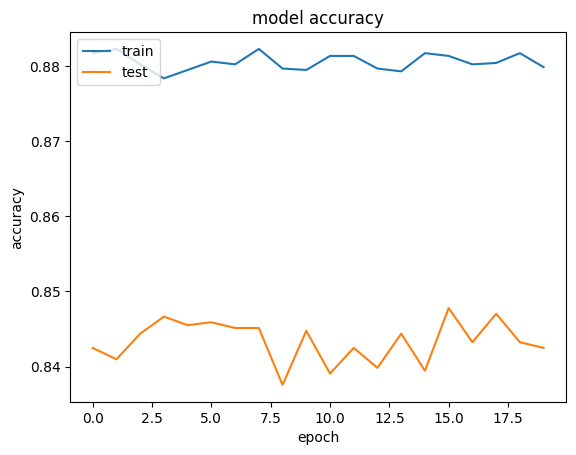

In [ ]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

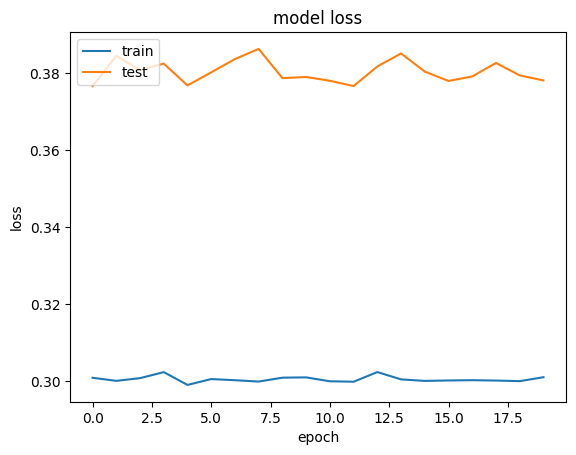

In [ ]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
## Part 3 - Making the prediction and evaluating the model
## Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1500,   95],
       [ 201,  204]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.852

In [ ]:
## check and get weights
## it always in array form because so many layers
classifier.get_weights()

[array([[-0.03535786, -0.48808923,  0.17097788,  0.11220426, -0.2679262 ,
          0.06563871,  0.19399184,  0.2775871 ,  0.09300502,  0.34744138,
          0.09690287],
        [-0.18512864, -0.58563507, -1.017299  ,  0.93127626,  0.18707985,
         -0.47404215,  0.3416397 , -0.00974917,  0.8029006 , -0.8772781 ,
          0.7555348 ],
        [ 0.24914907,  0.26900157,  0.14655925,  0.4947641 ,  0.27208194,
          0.29768258,  0.0099767 ,  0.01920906,  0.3445104 , -0.6029003 ,
          0.463952  ],
        [-0.6110927 ,  0.18100213, -0.00702159,  0.19083217, -0.3416142 ,
         -0.79259634, -0.22281878,  0.38572735, -0.7136732 , -1.3030998 ,
         -0.13228017],
        [-1.6786797 ,  0.31902045, -0.04436018, -0.26585943,  1.2906276 ,
          0.07729568, -1.1480066 ,  1.3184834 ,  0.0693794 ,  0.33137032,
          0.24765386],
        [ 0.13660538, -0.17349523,  0.0337774 , -0.01956811, -0.44314238,
         -0.6052054 , -0.08367103,  0.16281441,  0.24721923,  0.3290494

##Implementation of CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel values to be between 0 and 1
train_images , test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
## Verify the datatset

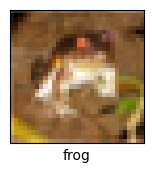

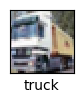

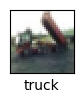

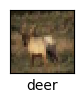

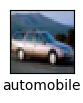

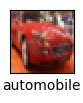

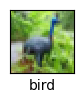

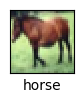

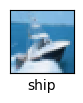

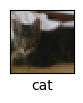

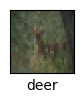

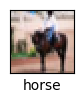

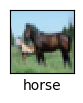

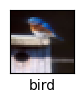

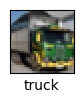

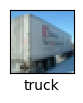

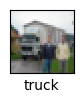

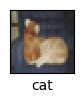

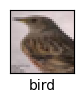

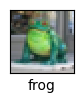

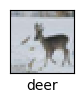

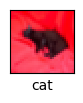

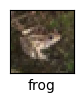

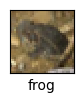

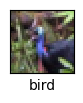

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
## adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#3 adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

## Add Dense layers on top ##

In [ ]:
model.add(layers.Flatten())
## this is hidden layer (ANN)
model.add(layers.Dense(64, activation = 'relu'))
## this our output layer
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,924 (484.08 KB)

 Trainable params: 123,924 (484.08 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model ##

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Changed 'SparseCategoricalCrossentorpy' to 'SparseCategoricalCrossentropy'
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3030 - loss: 1.8521 - val_accuracy: 0.5059 - val_loss: 1.3708
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.5502 - loss: 1.2532 - val_accuracy: 0.5959 - val_loss: 1.1328
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.6223 - loss: 1.0615 - val_accuracy: 0.6357 - val_loss: 1.0353
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6618 - loss: 0.9524 - val_accuracy: 0.6561 - val_loss: 0.9677
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6905 - loss: 0.8680 - val_accuracy: 0.6779 - val_loss: 0.9126
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7193 - loss: 0.7951 - val_accuracy: 0.6896 - val_loss: 0.8797
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7404 - loss: 0.7426 - val_accuracy: 0.6943 - val_loss: 0.9074
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.7497 -

In [ ]:
## Evaluate the model

313/313 - 7s - 22ms/step - accuracy: 0.7095 - loss: 0.8691


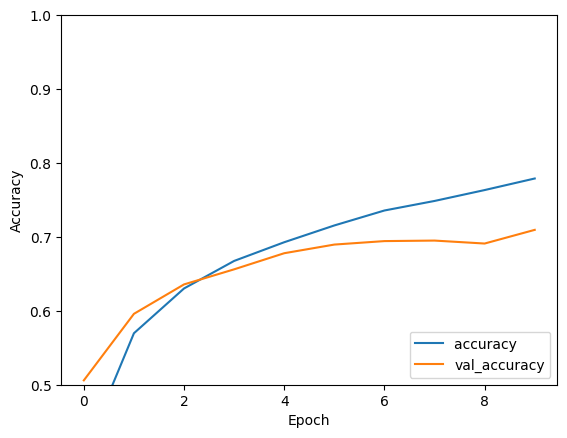

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy ')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [ ]:
print(test_acc)

0.7095000147819519


## **Natural Language Process **##

In [ ]:
pip install gensim

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
## checking the list of man
wv['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [ ]:
## ot check most similer vector or word of man
wv.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [ ]:
## Total window size = 300
## here we fetch most similer words between "king" and "queen"
op = wv.most_similar('king')
top = wv.most_similar('queen')
print("this is : ",op)
print("-----------------------&-------------------\n")
print("this is : ",top)


this is :  [('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
-----------------------&-------------------

this is :  [('queens', 0.739944338798523), ('princess', 0.7070532441139221), ('king', 0.6510956883430481), ('monarch', 0.6383602023124695), ('very_pampered_McElhatton', 0.6357026696205139), ('Queen', 0.6163407564163208), ('NYC_anglophiles_aflutter', 0.6060680150985718), ('Queen_Consort', 0.5923796892166138), ('princesses', 0.5908074975013733), ('royal', 0.5637185573577881)]


In [ ]:
## Similarity rate or accuracy between king and queen
wv.similarity('king','queen')

0.6510957

In [ ]:
## Wordcloud
import os

from os import path
from wordcloud import WordCloud

In [ ]:
text = """Kalam was elected as the 11th president of India in 2002 with the support of both the ruling Bharatiya Janata Party and the then-opposition Indian National Congress. Widely referred to as the "People's President",[7] he returned to his civilian life of education, writing and public service after a single term. He was a recipient of several prestigious awards, including the Bharat Ratna, India"""

In [ ]:
## Generate a word cloud image
wordcloud = WordCloud().generate(text)

In [ ]:
wordcloud

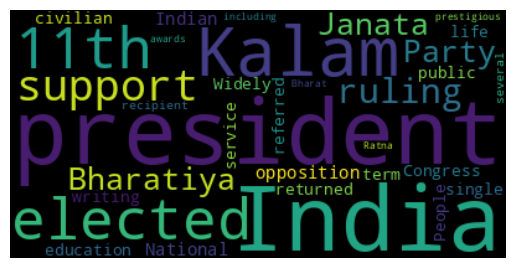

In [ ]:
## Display the generate image:
## the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
## Semantic meaning of cricket from google-word dictionary
wv.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [ ]:
## compare words similarity of words
wv.similarity("cricket", "sports")

0.40087253

In [ ]:
wv["king"]-wv["man"]+wv["woman"]

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

## Word2Vec and Avgword2vec ##

In [ ]:
import pandas as pd
## Column name as labels- output features
messages = pd.read_csv('/content/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

### Problem Statment on spam and ham classification ##
Today we working on Spam classification dataset by using machine learning algorithm's

Text preprocessing - tokenization, stopwords, stemming, limmatization, NLTK
Text -> Vectors -> bag of word , TF-IDF, Word2Vec , AvgWord2Vec

In [ ]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
## Total dataset lines
messages.shape

(5572, 2)

In [ ]:
## From  here, data cleaning and pre-processing part
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk

# This is where you download the stopwords
nltk.download('stopwords')
# This imports the stopwords module
from nltk.corpus import stopwords

# Import PorterStemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


corpus = []
for i in range(0, len(messages)):
    ## To remvoe all special characters from text except(a-zA-Z) special characters like @#$%^*
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])

    ## Lowering of word help in to removing duplicate words
    review = review.lower()
    review = review.split()

    # Now stopwords is defined and can be used.
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## here is corpus
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [ ]:
# Creating the Bag of Words model
## BOW (bag of words)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary = True,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X.shape

(5572, 2500)

In [ ]:
## Label encoding
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [ ]:
# Train Test Split
## Splitting data helps prevent overfitting and ensures the model generalizes well. This creates a more robust and versatile model for real-world use.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
## Using ML algorithm of naive_bayes
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [ ]:
## for checking the accuracy rate_of model
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
## prediction_score of model
score=accuracy_score(y_test,y_pred)
print(score)

0.9865470852017937


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       964
        True       0.93      0.98      0.95       151

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
# Creating the TF-IDF model
## TF-IDF stand for (Term Frequency - Inverse Document frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X = tv.fit_transform(corpus).toarray()

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
## using naive_bayes algorithm
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [ ]:
score = accuracy_score(y_test,y_pred)
print(score)

0.97847533632287


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       979
        True       0.85      1.00      0.92       136

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Word2Vec Implementation ##

In [ ]:
vec_king = wv['king']

In [ ]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Download 'wordnet' dataset if not already downloaded
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
corpus[100]

'please text anymore nothing else say'

In [ ]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [ ]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

In [ ]:
## Lets train Word2vec from scratch
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [ ]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'day',
 'ok',
 'free',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'love',
 'text',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'please',
 'later',
 'pls',
 'co',
 'msg',
 'min',
 'make',
 'night',
 'dear',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'great',
 'oh',
 'hope',
 'claim',
 'hey',
 'number',
 'give',
 'happy',
 'work',
 'wat',
 'friend',
 'yes',
 'way',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'tone',
 'win',
 'ask',
 'said',
 'cash',
 'life',
 'amp',
 'im',
 'yeah',
 'really',
 'meet',
 'babe',
 'find',
 'miss',
 'morning',
 'service',
 'year',
 'thanks',
 'uk',
 'last',
 'would',
 'anything',
 'com',
 'care',
 'lol',
 'nokia',
 'also',
 'feel',
 'every',
 'keep',
 'pick',
 'sure',
 'sent',
 'urgent',
 'contact',


In [ ]:
## count of model_corpus
model.corpus_count

5564

In [ ]:
## modele epochs
model.epochs

5

In [ ]:
## Here, checking the similar words of kid
model.wv.most_similar('kid')

[('enjoy', 0.9962874054908752),
 ('work', 0.9961684942245483),
 ('happy', 0.9960770010948181),
 ('life', 0.9960676431655884),
 ('hello', 0.9959482550621033),
 ('thing', 0.9959398508071899),
 ('person', 0.9959264993667603),
 ('day', 0.9959203004837036),
 ('haha', 0.9959177374839783),
 ('even', 0.9959055781364441)]

In [ ]:
## Checking of kid shape
model.wv['kid'].shape

(100,)

In [ ]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [ ]:
pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
words[73]

['performed']

In [ ]:
import numpy as np


In [ ]:
type(model.wv.index_to_key)

list

In [ ]:
#apply for the entire sentences
X=[]
for i in tqdm(range(len(words))):
    print("Hello",i)
    X.append(avg_word2vec(words[i]))

  0%|          | 0/5564 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  1%|▏         | 74/5564 [00:00<00:08, 684.64it/s]

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4
Hello 5
Hello 6
Hello 7
Hello 8
Hello 9
Hello 10
Hello 11
Hello 12
Hello 13
Hello 14
Hello 15
Hello 16
Hello 17
Hello 18
Hello 19
Hello 20
Hello 21
Hello 22
Hello 23
Hello 24
Hello 25
Hello 26
Hello 27
Hello 28
Hello 29
Hello 30
Hello 31
Hello 32
Hello 33
Hello 34
Hello 35
Hello 36
Hello 37
Hello 38
Hello 39
Hello 40
Hello 41
Hello 42
Hello 43
Hello 44
Hello 45
Hello 46
Hello 47
Hello 48
Hello 49
Hello 50
Hello 51
Hello 52
Hello 53
Hello 54
Hello 55
Hello 56
Hello 57
Hello 58
Hello 59
Hello 60
Hello 61
Hello 62
Hello 63
Hello 64
Hello 65
Hello 66
Hello 67
Hello 68
Hello 69
Hello 70
Hello 71
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
Hello 77
Hello 78
Hello 79
Hello 80
Hello 81
Hello 82
Hello 83
Hello 84
Hello 85
Hello 86
Hello 87
Hello 88
Hello 89
Hello 90
Hello 91
Hello 92
Hello 93
Hello 94
Hello 95
Hello 96
Hello 97
Hello 98
Hello 99
Hello 100
Hello 101
Hello 102
Hello 103
Hello 104
Hello 105
Hello 106
Hello 107
Hello 108
Hello 109
Hello 110


  4%|▍         | 232/5564 [00:00<00:06, 764.40it/s]

149
Hello 150
Hello 151
Hello 152
Hello 153
Hello 154
Hello 155
Hello 156
Hello 157
Hello 158
Hello 159
Hello 160
Hello 161
Hello 162
Hello 163
Hello 164
Hello 165
Hello 166
Hello 167
Hello 168
Hello 169
Hello 170
Hello 171
Hello 172
Hello 173
Hello 174
Hello 175
Hello 176
Hello 177
Hello 178
Hello 179
Hello 180
Hello 181
Hello 182
Hello 183
Hello 184
Hello 185
Hello 186
Hello 187
Hello 188
Hello 189
Hello 190
Hello 191
Hello 192
Hello 193
Hello 194
Hello 195
Hello 196
Hello 197
Hello 198
Hello 199
Hello 200
Hello 201
Hello 202
Hello 203
Hello 204
Hello 205
Hello 206
Hello 207
Hello 208
Hello 209
Hello 210
Hello 211
Hello 212
Hello 213
Hello 214
Hello 215
Hello 216
Hello 217
Hello 218
Hello 219
Hello 220
Hello 221
Hello 222
Hello 223
Hello 224
Hello 225
Hello 226
Hello 227
Hello 228
Hello 229
Hello 230
Hello 231
Hello 232
Hello 233
Hello 234
Hello 235
Hello 236
Hello 237
Hello 238
Hello 239
Hello 240
Hello 241
Hello 242
Hello 243
Hello 244
Hello 245
Hello 246
Hello 247
Hello 248
Hello 

  7%|▋         | 385/5564 [00:00<00:06, 757.79it/s]

Hello 308
Hello 309
Hello 310
Hello 311
Hello 312
Hello 313
Hello 314
Hello 315
Hello 316
Hello 317
Hello 318
Hello 319
Hello 320
Hello 321
Hello 322
Hello 323
Hello 324
Hello 325
Hello 326
Hello 327
Hello 328
Hello 329
Hello 330
Hello 331
Hello 332
Hello 333
Hello 334
Hello 335
Hello 336
Hello 337
Hello 338
Hello 339
Hello 340
Hello 341
Hello 342
Hello 343
Hello 344
Hello 345
Hello 346
Hello 347
Hello 348
Hello 349
Hello 350
Hello 351
Hello 352
Hello 353
Hello 354
Hello 355
Hello 356
Hello 357
Hello 358
Hello 359
Hello 360
Hello 361
Hello 362
Hello 363
Hello 364
Hello 365
Hello 366
Hello 367
Hello 368
Hello 369
Hello 370
Hello 371
Hello 372
Hello 373
Hello 374
Hello 375
Hello 376
Hello 377
Hello 378
Hello 379
Hello 380
Hello 381
Hello 382
Hello 383
Hello 384
Hello 385
Hello 386
Hello 387
Hello 388
Hello 389
Hello 390
Hello 391
Hello 392
Hello 393
Hello 394
Hello 395
Hello 396
Hello 397
Hello 398
Hello 399
Hello 400
Hello 401
Hello 402
Hello 403
Hello 404
Hello 405
Hello 406
Hello 407


 11%|█         | 625/5564 [00:00<00:06, 765.26it/s]

Hello 469
Hello 470
Hello 471
Hello 472
Hello 473
Hello 474
Hello 475
Hello 476
Hello 477
Hello 478
Hello 479
Hello 480
Hello 481
Hello 482
Hello 483
Hello 484
Hello 485
Hello 486
Hello 487
Hello 488
Hello 489
Hello 490
Hello 491
Hello 492
Hello 493
Hello 494
Hello 495
Hello 496
Hello 497
Hello 498
Hello 499
Hello 500
Hello 501
Hello 502
Hello 503
Hello 504
Hello 505
Hello 506
Hello 507
Hello 508
Hello 509
Hello 510
Hello 511
Hello 512
Hello 513
Hello 514
Hello 515
Hello 516
Hello 517
Hello 518
Hello 519
Hello 520
Hello 521
Hello 522
Hello 523
Hello 524
Hello 525
Hello 526
Hello 527
Hello 528
Hello 529
Hello 530
Hello 531
Hello 532
Hello 533
Hello 534
Hello 535
Hello 536
Hello 537
Hello 538
Hello 539
Hello 540
Hello 541
Hello 542
Hello 543
Hello 544
Hello 545
Hello 546
Hello 547
Hello 548
Hello 549
Hello 550
Hello 551
Hello 552
Hello 553
Hello 554
Hello 555
Hello 556
Hello 557
Hello 558
Hello 559
Hello 560
Hello 561
Hello 562
Hello 563
Hello 564
Hello 565
Hello 566
Hello 567
Hello 568


 14%|█▍        | 792/5564 [00:01<00:05, 797.00it/s]

629
Hello 630
Hello 631
Hello 632
Hello 633
Hello 634
Hello 635
Hello 636
Hello 637
Hello 638
Hello 639
Hello 640
Hello 641
Hello 642
Hello 643
Hello 644
Hello 645
Hello 646
Hello 647
Hello 648
Hello 649
Hello 650
Hello 651
Hello 652
Hello 653
Hello 654
Hello 655
Hello 656
Hello 657
Hello 658
Hello 659
Hello 660
Hello 661
Hello 662
Hello 663
Hello 664
Hello 665
Hello 666
Hello 667
Hello 668
Hello 669
Hello 670
Hello 671
Hello 672
Hello 673
Hello 674
Hello 675
Hello 676
Hello 677
Hello 678
Hello 679
Hello 680
Hello 681
Hello 682
Hello 683
Hello 684
Hello 685
Hello 686
Hello 687
Hello 688
Hello 689
Hello 690
Hello 691
Hello 692
Hello 693
Hello 694
Hello 695
Hello 696
Hello 697
Hello 698
Hello 699
Hello 700
Hello 701
Hello 702
Hello 703
Hello 704
Hello 705
Hello 706
Hello 707
Hello 708
Hello 709
Hello 710
Hello 711
Hello 712
Hello 713
Hello 714
Hello 715
Hello 716
Hello 717
Hello 718
Hello 719
Hello 720
Hello 721
Hello 722
Hello 723
Hello 724
Hello 725
Hello 726
Hello 727
Hello 728
Hello 

 16%|█▌        | 872/5564 [00:01<00:06, 777.04it/s]

 797
Hello 798
Hello 799
Hello 800
Hello 801
Hello 802
Hello 803
Hello 804
Hello 805
Hello 806
Hello 807
Hello 808
Hello 809
Hello 810
Hello 811
Hello 812
Hello 813
Hello 814
Hello 815
Hello 816
Hello 817
Hello 818
Hello 819
Hello 820
Hello 821
Hello 822
Hello 823
Hello 824
Hello 825
Hello 826
Hello 827
Hello 828
Hello 829
Hello 830
Hello 831
Hello 832
Hello 833
Hello 834
Hello 835
Hello 836
Hello 837
Hello 838
Hello 839
Hello 840
Hello 841
Hello 842
Hello 843
Hello 844
Hello 845
Hello 846
Hello 847
Hello 848
Hello 849
Hello 850
Hello 851
Hello 852
Hello 853
Hello 854
Hello 855
Hello 856
Hello 857
Hello 858
Hello 859
Hello 860
Hello 861
Hello 862
Hello 863
Hello 864
Hello 865
Hello 866
Hello 867
Hello 868
Hello 869
Hello 870
Hello 871
Hello 872
Hello 873
Hello 874
Hello 875
Hello 876
Hello 877
Hello 878
Hello 879
Hello 880
Hello 881
Hello 882
Hello 883
Hello 884
Hello 885
Hello 886
Hello 887
Hello 888
Hello 889
Hello 890
Hello 891
Hello 892
Hello 893
Hello 894
Hello 895
Hello 896
Hello

 19%|█▊        | 1031/5564 [00:01<00:06, 752.78it/s]

Hello 948
Hello 949
Hello 950
Hello 951
Hello 952
Hello 953
Hello 954
Hello 955
Hello 956
Hello 957
Hello 958
Hello 959
Hello 960
Hello 961
Hello 962
Hello 963
Hello 964
Hello 965
Hello 966
Hello 967
Hello 968
Hello 969
Hello 970
Hello 971
Hello 972
Hello 973
Hello 974
Hello 975
Hello 976
Hello 977
Hello 978
Hello 979
Hello 980
Hello 981
Hello 982
Hello 983
Hello 984
Hello 985
Hello 986
Hello 987
Hello 988
Hello 989
Hello 990
Hello 991
Hello 992
Hello 993
Hello 994
Hello 995
Hello 996
Hello 997
Hello 998
Hello 999
Hello 1000
Hello 1001
Hello 1002
Hello 1003
Hello 1004
Hello 1005
Hello 1006
Hello 1007
Hello 1008
Hello 1009
Hello 1010
Hello 1011
Hello 1012
Hello 1013
Hello 1014
Hello 1015
Hello 1016
Hello 1017
Hello 1018
Hello 1019
Hello 1020
Hello 1021
Hello 1022
Hello 1023
Hello 1024
Hello 1025
Hello 1026
Hello 1027
Hello 1028
Hello 1029
Hello 1030
Hello 1031
Hello 1032
Hello 1033
Hello 1034
Hello 1035
Hello 1036
Hello 1037
Hello 1038
Hello 1039
Hello 1040
Hello 1041
Hello 1042
Hello 1

 21%|██▏       | 1194/5564 [00:01<00:05, 756.17it/s]

1101
Hello 1102
Hello 1103
Hello 1104
Hello 1105
Hello 1106
Hello 1107
Hello 1108
Hello 1109
Hello 1110
Hello 1111
Hello 1112
Hello 1113
Hello 1114
Hello 1115
Hello 1116
Hello 1117
Hello 1118
Hello 1119
Hello 1120
Hello 1121
Hello 1122
Hello 1123
Hello 1124
Hello 1125
Hello 1126
Hello 1127
Hello 1128
Hello 1129
Hello 1130
Hello 1131
Hello 1132
Hello 1133
Hello 1134
Hello 1135
Hello 1136
Hello 1137
Hello 1138
Hello 1139
Hello 1140
Hello 1141
Hello 1142
Hello 1143
Hello 1144
Hello 1145
Hello 1146
Hello 1147
Hello 1148
Hello 1149
Hello 1150
Hello 1151
Hello 1152
Hello 1153
Hello 1154
Hello 1155
Hello 1156
Hello 1157
Hello 1158
Hello 1159
Hello 1160
Hello 1161
Hello 1162
Hello 1163
Hello 1164
Hello 1165
Hello 1166
Hello 1167
Hello 1168
Hello 1169
Hello 1170
Hello 1171
Hello 1172
Hello 1173
Hello 1174
Hello 1175
Hello 1176
Hello 1177
Hello 1178
Hello 1179
Hello 1180
Hello 1181
Hello 1182
Hello 1183
Hello 1184
Hello 1185
Hello 1186
Hello 1187
Hello 1188
Hello 1189
Hello 1190
Hello 1191
Hello

 24%|██▍       | 1352/5564 [00:01<00:05, 765.09it/s]

Hello 1268
Hello 1269
Hello 1270
Hello 1271
Hello 1272
Hello 1273
Hello 1274
Hello 1275
Hello 1276
Hello 1277
Hello 1278
Hello 1279
Hello 1280
Hello 1281
Hello 1282
Hello 1283
Hello 1284
Hello 1285
Hello 1286
Hello 1287
Hello 1288
Hello 1289
Hello 1290
Hello 1291
Hello 1292
Hello 1293
Hello 1294
Hello 1295
Hello 1296
Hello 1297
Hello 1298
Hello 1299
Hello 1300
Hello 1301
Hello 1302
Hello 1303
Hello 1304
Hello 1305
Hello 1306
Hello 1307
Hello 1308
Hello 1309
Hello 1310
Hello 1311
Hello 1312
Hello 1313
Hello 1314
Hello 1315
Hello 1316
Hello 1317
Hello 1318
Hello 1319
Hello 1320
Hello 1321
Hello 1322
Hello 1323
Hello 1324
Hello 1325
Hello 1326
Hello 1327
Hello 1328
Hello 1329
Hello 1330
Hello 1331
Hello 1332
Hello 1333
Hello 1334
Hello 1335
Hello 1336
Hello 1337
Hello 1338
Hello 1339
Hello 1340
Hello 1341
Hello 1342
Hello 1343
Hello 1344
Hello 1345
Hello 1346
Hello 1347
Hello 1348
Hello 1349
Hello 1350
Hello 1351
Hello 1352
Hello 1353
Hello 1354
Hello 1355
Hello 1356
Hello 1357
Hello 1358

 27%|██▋       | 1506/5564 [00:01<00:05, 737.65it/s]

1428
Hello 1429
Hello 1430
Hello 1431
Hello 1432
Hello 1433
Hello 1434
Hello 1435
Hello 1436
Hello 1437
Hello 1438
Hello 1439
Hello 1440
Hello 1441
Hello 1442
Hello 1443
Hello 1444
Hello 1445
Hello 1446
Hello 1447
Hello 1448
Hello 1449
Hello 1450
Hello 1451
Hello 1452
Hello 1453
Hello 1454
Hello 1455
Hello 1456
Hello 1457
Hello 1458
Hello 1459
Hello 1460
Hello 1461
Hello 1462
Hello 1463
Hello 1464
Hello 1465
Hello 1466
Hello 1467
Hello 1468
Hello 1469
Hello 1470
Hello 1471
Hello 1472
Hello 1473
Hello 1474
Hello 1475
Hello 1476
Hello 1477
Hello 1478
Hello 1479
Hello 1480
Hello 1481
Hello 1482
Hello 1483
Hello 1484
Hello 1485
Hello 1486
Hello 1487
Hello 1488
Hello 1489
Hello 1490
Hello 1491
Hello 1492
Hello 1493
Hello 1494
Hello 1495
Hello 1496
Hello 1497
Hello 1498
Hello 1499
Hello 1500
Hello 1501
Hello 1502
Hello 1503
Hello 1504
Hello 1505
Hello 1506
Hello 1507
Hello 1508
Hello 1509
Hello 1510
Hello 1511
Hello 1512
Hello 1513
Hello 1514
Hello 1515
Hello 1516
Hello 1517
Hello 1518
Hello

 30%|██▉       | 1655/5564 [00:02<00:05, 721.15it/s]


Hello 1566
Hello 1567
Hello 1568
Hello 1569
Hello 1570
Hello 1571
Hello 1572
Hello 1573
Hello 1574
Hello 1575
Hello 1576
Hello 1577
Hello 1578
Hello 1579
Hello 1580
Hello 1581
Hello 1582
Hello 1583
Hello 1584
Hello 1585
Hello 1586
Hello 1587
Hello 1588
Hello 1589
Hello 1590
Hello 1591
Hello 1592
Hello 1593
Hello 1594
Hello 1595
Hello 1596
Hello 1597
Hello 1598
Hello 1599
Hello 1600
Hello 1601
Hello 1602
Hello 1603
Hello 1604
Hello 1605
Hello 1606
Hello 1607
Hello 1608
Hello 1609
Hello 1610
Hello 1611
Hello 1612
Hello 1613
Hello 1614
Hello 1615
Hello 1616
Hello 1617
Hello 1618
Hello 1619
Hello 1620
Hello 1621
Hello 1622
Hello 1623
Hello 1624
Hello 1625
Hello 1626
Hello 1627
Hello 1628
Hello 1629
Hello 1630
Hello 1631
Hello 1632
Hello 1633
Hello 1634
Hello 1635
Hello 1636
Hello 1637
Hello 1638
Hello 1639
Hello 1640
Hello 1641
Hello 1642
Hello 1643
Hello 1644
Hello 1645
Hello 1646
Hello 1647
Hello 1648
Hello 1649
Hello 1650
Hello 1651
Hello 1652
Hello 1653
Hello 1654
Hello 1655
Hello 165

 32%|███▏      | 1800/5564 [00:02<00:05, 693.25it/s]

1716
Hello 1717
Hello 1718
Hello 1719
Hello 1720
Hello 1721
Hello 1722
Hello 1723
Hello 1724
Hello 1725
Hello 1726
Hello 1727
Hello 1728
Hello 1729
Hello 1730
Hello 1731
Hello 1732
Hello 1733
Hello 1734
Hello 1735
Hello 1736
Hello 1737
Hello 1738
Hello 1739
Hello 1740
Hello 1741
Hello 1742
Hello 1743
Hello 1744
Hello 1745
Hello 1746
Hello 1747
Hello 1748
Hello 1749
Hello 1750
Hello 1751
Hello 1752
Hello 1753
Hello 1754
Hello 1755
Hello 1756
Hello 1757
Hello 1758
Hello 1759
Hello 1760
Hello 1761
Hello 1762
Hello 1763
Hello 1764
Hello 1765
Hello 1766
Hello 1767
Hello 1768
Hello 1769
Hello 1770
Hello 1771
Hello 1772
Hello 1773
Hello 1774
Hello 1775
Hello 1776
Hello 1777
Hello 1778
Hello 1779
Hello 1780
Hello 1781
Hello 1782
Hello 1783
Hello 1784
Hello 1785
Hello 1786
Hello 1787
Hello 1788
Hello 1789
Hello 1790
Hello 1791
Hello 1792
Hello 1793
Hello 1794
Hello 1795
Hello 1796
Hello 1797
Hello 1798
Hello 1799
Hello 1800
Hello 1801
Hello 1802
Hello 1803
Hello 1804
Hello 1805
Hello 1806
Hello

 35%|███▌      | 1963/5564 [00:02<00:04, 755.81it/s]

1859
Hello 1860
Hello 1861
Hello 1862
Hello 1863
Hello 1864
Hello 1865
Hello 1866
Hello 1867
Hello 1868
Hello 1869
Hello 1870
Hello 1871
Hello 1872
Hello 1873
Hello 1874
Hello 1875
Hello 1876
Hello 1877
Hello 1878
Hello 1879
Hello 1880
Hello 1881
Hello 1882
Hello 1883
Hello 1884
Hello 1885
Hello 1886
Hello 1887
Hello 1888
Hello 1889
Hello 1890
Hello 1891
Hello 1892
Hello 1893
Hello 1894
Hello 1895
Hello 1896
Hello 1897
Hello 1898
Hello 1899
Hello 1900
Hello 1901
Hello 1902
Hello 1903
Hello 1904
Hello 1905
Hello 1906
Hello 1907
Hello 1908
Hello 1909
Hello 1910
Hello 1911
Hello 1912
Hello 1913
Hello 1914
Hello 1915
Hello 1916
Hello 1917
Hello 1918
Hello 1919
Hello 1920
Hello 1921
Hello 1922
Hello 1923
Hello 1924
Hello 1925
Hello 1926
Hello 1927
Hello 1928
Hello 1929
Hello 1930
Hello 1931
Hello 1932
Hello 1933
Hello 1934
Hello 1935
Hello 1936
Hello 1937
Hello 1938
Hello 1939
Hello 1940
Hello 1941
Hello 1942
Hello 1943
Hello 1944
Hello 1945
Hello 1946
Hello 1947
Hello 1948
Hello 1949
Hello

 38%|███▊      | 2121/5564 [00:02<00:04, 734.42it/s]

2016
Hello 2017
Hello 2018
Hello 2019
Hello 2020
Hello 2021
Hello 2022
Hello 2023
Hello 2024
Hello 2025
Hello 2026
Hello 2027
Hello 2028
Hello 2029
Hello 2030
Hello 2031
Hello 2032
Hello 2033
Hello 2034
Hello 2035
Hello 2036
Hello 2037
Hello 2038
Hello 2039
Hello 2040
Hello 2041
Hello 2042
Hello 2043
Hello 2044
Hello 2045
Hello 2046
Hello 2047
Hello 2048
Hello 2049
Hello 2050
Hello 2051
Hello 2052
Hello 2053
Hello 2054
Hello 2055
Hello 2056
Hello 2057
Hello 2058
Hello 2059
Hello 2060
Hello 2061
Hello 2062
Hello 2063
Hello 2064
Hello 2065
Hello 2066
Hello 2067
Hello 2068
Hello 2069
Hello 2070
Hello 2071
Hello 2072
Hello 2073
Hello 2074
Hello 2075
Hello 2076
Hello 2077
Hello 2078
Hello 2079
Hello 2080
Hello 2081
Hello 2082
Hello 2083
Hello 2084
Hello 2085
Hello 2086
Hello 2087
Hello 2088
Hello 2089
Hello 2090
Hello 2091
Hello 2092
Hello 2093
Hello 2094
Hello 2095
Hello 2096
Hello 2097
Hello 2098
Hello 2099
Hello 2100
Hello 2101
Hello 2102
Hello 2103
Hello 2104
Hello 2105
Hello 2106
Hello

 41%|████      | 2276/5564 [00:03<00:04, 754.18it/s]

2177
Hello 2178
Hello 2179
Hello 2180
Hello 2181
Hello 2182
Hello 2183
Hello 2184
Hello 2185
Hello 2186
Hello 2187
Hello 2188
Hello 2189
Hello 2190
Hello 2191
Hello 2192
Hello 2193
Hello 2194
Hello 2195
Hello 2196
Hello 2197
Hello 2198
Hello 2199
Hello 2200
Hello 2201
Hello 2202
Hello 2203
Hello 2204
Hello 2205
Hello 2206
Hello 2207
Hello 2208
Hello 2209
Hello 2210
Hello 2211
Hello 2212
Hello 2213
Hello 2214
Hello 2215
Hello 2216
Hello 2217
Hello 2218
Hello 2219
Hello 2220
Hello 2221
Hello 2222
Hello 2223
Hello 2224
Hello 2225
Hello 2226
Hello 2227
Hello 2228
Hello 2229
Hello 2230
Hello 2231
Hello 2232
Hello 2233
Hello 2234
Hello 2235
Hello 2236
Hello 2237
Hello 2238
Hello 2239
Hello 2240
Hello 2241
Hello 2242
Hello 2243
Hello 2244
Hello 2245
Hello 2246
Hello 2247
Hello 2248
Hello 2249
Hello 2250
Hello 2251
Hello 2252
Hello 2253
Hello 2254
Hello 2255
Hello 2256
Hello 2257
Hello 2258
Hello 2259
Hello 2260
Hello 2261
Hello 2262
Hello 2263
Hello 2264
Hello 2265
Hello 2266
Hello 2267
Hello

 44%|████▍     | 2449/5564 [00:03<00:03, 800.08it/s]

2354
Hello 2355
Hello 2356
Hello 2357
Hello 2358
Hello 2359
Hello 2360
Hello 2361
Hello 2362
Hello 2363
Hello 2364
Hello 2365
Hello 2366
Hello 2367
Hello 2368
Hello 2369
Hello 2370
Hello 2371
Hello 2372
Hello 2373
Hello 2374
Hello 2375
Hello 2376
Hello 2377
Hello 2378
Hello 2379
Hello 2380
Hello 2381
Hello 2382
Hello 2383
Hello 2384
Hello 2385
Hello 2386
Hello 2387
Hello 2388
Hello 2389
Hello 2390
Hello 2391
Hello 2392
Hello 2393
Hello 2394
Hello 2395
Hello 2396
Hello 2397
Hello 2398
Hello 2399
Hello 2400
Hello 2401
Hello 2402
Hello 2403
Hello 2404
Hello 2405
Hello 2406
Hello 2407
Hello 2408
Hello 2409
Hello 2410
Hello 2411
Hello 2412
Hello 2413
Hello 2414
Hello 2415
Hello 2416
Hello 2417
Hello 2418
Hello 2419
Hello 2420
Hello 2421
Hello 2422
Hello 2423
Hello 2424
Hello 2425
Hello 2426
Hello 2427
Hello 2428
Hello 2429
Hello 2430
Hello 2431
Hello 2432
Hello 2433
Hello 2434
Hello 2435
Hello 2436
Hello 2437
Hello 2438
Hello 2439
Hello 2440
Hello 2441
Hello 2442
Hello 2443
Hello 2444
Hello

 47%|████▋     | 2610/5564 [00:03<00:03, 785.90it/s]

2508
Hello 2509
Hello 2510
Hello 2511
Hello 2512
Hello 2513
Hello 2514
Hello 2515
Hello 2516
Hello 2517
Hello 2518
Hello 2519
Hello 2520
Hello 2521
Hello 2522
Hello 2523
Hello 2524
Hello 2525
Hello 2526
Hello 2527
Hello 2528
Hello 2529
Hello 2530
Hello 2531
Hello 2532
Hello 2533
Hello 2534
Hello 2535
Hello 2536
Hello 2537
Hello 2538
Hello 2539
Hello 2540
Hello 2541
Hello 2542
Hello 2543
Hello 2544
Hello 2545
Hello 2546
Hello 2547
Hello 2548
Hello 2549
Hello 2550
Hello 2551
Hello 2552
Hello 2553
Hello 2554
Hello 2555
Hello 2556
Hello 2557
Hello 2558
Hello 2559
Hello 2560
Hello 2561
Hello 2562
Hello 2563
Hello 2564
Hello 2565
Hello 2566
Hello 2567
Hello 2568
Hello 2569
Hello 2570
Hello 2571
Hello 2572
Hello 2573
Hello 2574
Hello 2575
Hello 2576
Hello 2577
Hello 2578
Hello 2579
Hello 2580
Hello 2581
Hello 2582
Hello 2583
Hello 2584
Hello 2585
Hello 2586
Hello 2587
Hello 2588
Hello 2589
Hello 2590
Hello 2591
Hello 2592
Hello 2593
Hello 2594
Hello 2595
Hello 2596
Hello 2597
Hello 2598
Hello

 50%|████▉     | 2780/5564 [00:03<00:03, 799.67it/s]

Hello 2674
Hello 2675
Hello 2676
Hello 2677
Hello 2678
Hello 2679
Hello 2680
Hello 2681
Hello 2682
Hello 2683
Hello 2684
Hello 2685
Hello 2686
Hello 2687
Hello 2688
Hello 2689
Hello 2690
Hello 2691
Hello 2692
Hello 2693
Hello 2694
Hello 2695
Hello 2696
Hello 2697
Hello 2698
Hello 2699
Hello 2700
Hello 2701
Hello 2702
Hello 2703
Hello 2704
Hello 2705
Hello 2706
Hello 2707
Hello 2708
Hello 2709
Hello 2710
Hello 2711
Hello 2712
Hello 2713
Hello 2714
Hello 2715
Hello 2716
Hello 2717
Hello 2718
Hello 2719
Hello 2720
Hello 2721
Hello 2722
Hello 2723
Hello 2724
Hello 2725
Hello 2726
Hello 2727
Hello 2728
Hello 2729
Hello 2730
Hello 2731
Hello 2732
Hello 2733
Hello 2734
Hello 2735
Hello 2736
Hello 2737
Hello 2738
Hello 2739
Hello 2740
Hello 2741
Hello 2742
Hello 2743
Hello 2744
Hello 2745
Hello 2746
Hello 2747
Hello 2748
Hello 2749
Hello 2750
Hello 2751
Hello 2752
Hello 2753
Hello 2754
Hello 2755
Hello 2756
Hello 2757
Hello 2758
Hello 2759
Hello 2760
Hello 2761
Hello 2762
Hello 2763
Hello 2764

 53%|█████▎    | 2945/5564 [00:03<00:03, 802.89it/s]

2833
Hello 2834
Hello 2835
Hello 2836
Hello 2837
Hello 2838
Hello 2839
Hello 2840
Hello 2841
Hello 2842
Hello 2843
Hello 2844
Hello 2845
Hello 2846
Hello 2847
Hello 2848
Hello 2849
Hello 2850
Hello 2851
Hello 2852
Hello 2853
Hello 2854
Hello 2855
Hello 2856
Hello 2857
Hello 2858
Hello 2859
Hello 2860
Hello 2861
Hello 2862
Hello 2863
Hello 2864
Hello 2865
Hello 2866
Hello 2867
Hello 2868
Hello 2869
Hello 2870
Hello 2871
Hello 2872
Hello 2873
Hello 2874
Hello 2875
Hello 2876
Hello 2877
Hello 2878
Hello 2879
Hello 2880
Hello 2881
Hello 2882
Hello 2883
Hello 2884
Hello 2885
Hello 2886
Hello 2887
Hello 2888
Hello 2889
Hello 2890
Hello 2891
Hello 2892
Hello 2893
Hello 2894
Hello 2895
Hello 2896
Hello 2897
Hello 2898
Hello 2899
Hello 2900
Hello 2901
Hello 2902
Hello 2903
Hello 2904
Hello 2905
Hello 2906
Hello 2907
Hello 2908
Hello 2909
Hello 2910
Hello 2911
Hello 2912
Hello 2913
Hello 2914
Hello 2915
Hello 2916
Hello 2917
Hello 2918
Hello 2919
Hello 2920
Hello 2921
Hello 2922
Hello 2923
Hello

 56%|█████▌    | 3107/5564 [00:04<00:03, 803.05it/s]

3006
Hello 3007
Hello 3008
Hello 3009
Hello 3010
Hello 3011
Hello 3012
Hello 3013
Hello 3014
Hello 3015
Hello 3016
Hello 3017
Hello 3018
Hello 3019
Hello 3020
Hello 3021
Hello 3022
Hello 3023
Hello 3024
Hello 3025
Hello 3026
Hello 3027
Hello 3028
Hello 3029
Hello 3030
Hello 3031
Hello 3032
Hello 3033
Hello 3034
Hello 3035
Hello 3036
Hello 3037
Hello 3038
Hello 3039
Hello 3040
Hello 3041
Hello 3042
Hello 3043
Hello 3044
Hello 3045
Hello 3046
Hello 3047
Hello 3048
Hello 3049
Hello 3050
Hello 3051
Hello 3052
Hello 3053
Hello 3054
Hello 3055
Hello 3056
Hello 3057
Hello 3058
Hello 3059
Hello 3060
Hello 3061
Hello 3062
Hello 3063
Hello 3064
Hello 3065
Hello 3066
Hello 3067
Hello 3068
Hello 3069
Hello 3070
Hello 3071
Hello 3072
Hello 3073
Hello 3074
Hello 3075
Hello 3076
Hello 3077
Hello 3078
Hello 3079
Hello 3080
Hello 3081
Hello 3082
Hello 3083
Hello 3084
Hello 3085
Hello 3086
Hello 3087
Hello 3088
Hello 3089
Hello 3090
Hello 3091
Hello 3092
Hello 3093
Hello 3094
Hello 3095
Hello 3096
Hello

 59%|█████▊    | 3268/5564 [00:04<00:02, 793.08it/s]

Hello 3171
Hello 3172
Hello 3173
Hello 3174
Hello 3175
Hello 3176
Hello 3177
Hello 3178
Hello 3179
Hello 3180
Hello 3181
Hello 3182
Hello 3183
Hello 3184
Hello 3185
Hello 3186
Hello 3187
Hello 3188
Hello 3189
Hello 3190
Hello 3191
Hello 3192
Hello 3193
Hello 3194
Hello 3195
Hello 3196
Hello 3197
Hello 3198
Hello 3199
Hello 3200
Hello 3201
Hello 3202
Hello 3203
Hello 3204
Hello 3205
Hello 3206
Hello 3207
Hello 3208
Hello 3209
Hello 3210
Hello 3211
Hello 3212
Hello 3213
Hello 3214
Hello 3215
Hello 3216
Hello 3217
Hello 3218
Hello 3219
Hello 3220
Hello 3221
Hello 3222
Hello 3223
Hello 3224
Hello 3225
Hello 3226
Hello 3227
Hello 3228
Hello 3229
Hello 3230
Hello 3231
Hello 3232
Hello 3233
Hello 3234
Hello 3235
Hello 3236
Hello 3237
Hello 3238
Hello 3239
Hello 3240
Hello 3241
Hello 3242
Hello 3243
Hello 3244
Hello 3245
Hello 3246
Hello 3247
Hello 3248
Hello 3249
Hello 3250
Hello 3251
Hello 3252
Hello 3253
Hello 3254
Hello 3255
Hello 3256
Hello 3257
Hello 3258
Hello 3259
Hello 3260
Hello 3261

 62%|██████▏   | 3429/5564 [00:04<00:02, 765.84it/s]

 3323
Hello 3324
Hello 3325
Hello 3326
Hello 3327
Hello 3328
Hello 3329
Hello 3330
Hello 3331
Hello 3332
Hello 3333
Hello 3334
Hello 3335
Hello 3336
Hello 3337
Hello 3338
Hello 3339
Hello 3340
Hello 3341
Hello 3342
Hello 3343
Hello 3344
Hello 3345
Hello 3346
Hello 3347
Hello 3348
Hello 3349
Hello 3350
Hello 3351
Hello 3352
Hello 3353
Hello 3354
Hello 3355
Hello 3356
Hello 3357
Hello 3358
Hello 3359
Hello 3360
Hello 3361
Hello 3362
Hello 3363
Hello 3364
Hello 3365
Hello 3366
Hello 3367
Hello 3368
Hello 3369
Hello 3370
Hello 3371
Hello 3372
Hello 3373
Hello 3374
Hello 3375
Hello 3376
Hello 3377
Hello 3378
Hello 3379
Hello 3380
Hello 3381
Hello 3382
Hello 3383
Hello 3384
Hello 3385
Hello 3386
Hello 3387
Hello 3388
Hello 3389
Hello 3390
Hello 3391
Hello 3392
Hello 3393
Hello 3394
Hello 3395
Hello 3396
Hello 3397
Hello 3398
Hello 3399
Hello 3400
Hello 3401
Hello 3402
Hello 3403
Hello 3404
Hello 3405
Hello 3406
Hello 3407
Hello 3408
Hello 3409
Hello 3410
Hello 3411
Hello 3412
Hello 3413
Hell

 65%|██████▍   | 3591/5564 [00:04<00:02, 788.20it/s]

Hello 3487
Hello 3488
Hello 3489
Hello 3490
Hello 3491
Hello 3492
Hello 3493
Hello 3494
Hello 3495
Hello 3496
Hello 3497
Hello 3498
Hello 3499
Hello 3500
Hello 3501
Hello 3502
Hello 3503
Hello 3504
Hello 3505
Hello 3506
Hello 3507
Hello 3508
Hello 3509
Hello 3510
Hello 3511
Hello 3512
Hello 3513
Hello 3514
Hello 3515
Hello 3516
Hello 3517
Hello 3518
Hello 3519
Hello 3520
Hello 3521
Hello 3522
Hello 3523
Hello 3524
Hello 3525
Hello 3526
Hello 3527
Hello 3528
Hello 3529
Hello 3530
Hello 3531
Hello 3532
Hello 3533
Hello 3534
Hello 3535
Hello 3536
Hello 3537
Hello 3538
Hello 3539
Hello 3540
Hello 3541
Hello 3542
Hello 3543
Hello 3544
Hello 3545
Hello 3546
Hello 3547
Hello 3548
Hello 3549
Hello 3550
Hello 3551
Hello 3552
Hello 3553
Hello 3554
Hello 3555
Hello 3556
Hello 3557
Hello 3558
Hello 3559
Hello 3560
Hello 3561
Hello 3562
Hello 3563
Hello 3564
Hello 3565
Hello 3566
Hello 3567
Hello 3568
Hello 3569
Hello 3570
Hello 3571
Hello 3572
Hello 3573
Hello 3574
Hello 3575
Hello 3576
Hello 3577

 68%|██████▊   | 3762/5564 [00:04<00:02, 798.53it/s]

Hello 3657
Hello 3658
Hello 3659
Hello 3660
Hello 3661
Hello 3662
Hello 3663
Hello 3664
Hello 3665
Hello 3666
Hello 3667
Hello 3668
Hello 3669
Hello 3670
Hello 3671
Hello 3672
Hello 3673
Hello 3674
Hello 3675
Hello 3676
Hello 3677
Hello 3678
Hello 3679
Hello 3680
Hello 3681
Hello 3682
Hello 3683
Hello 3684
Hello 3685
Hello 3686
Hello 3687
Hello 3688
Hello 3689
Hello 3690
Hello 3691
Hello 3692
Hello 3693
Hello 3694
Hello 3695
Hello 3696
Hello 3697
Hello 3698
Hello 3699
Hello 3700
Hello 3701
Hello 3702
Hello 3703
Hello 3704
Hello 3705
Hello 3706
Hello 3707
Hello 3708
Hello 3709
Hello 3710
Hello 3711
Hello 3712
Hello 3713
Hello 3714
Hello 3715
Hello 3716
Hello 3717
Hello 3718
Hello 3719
Hello 3720
Hello 3721
Hello 3722
Hello 3723
Hello 3724
Hello 3725
Hello 3726
Hello 3727
Hello 3728
Hello 3729
Hello 3730
Hello 3731
Hello 3732
Hello 3733
Hello 3734
Hello 3735
Hello 3736
Hello 3737
Hello 3738
Hello 3739
Hello 3740
Hello 3741
Hello 3742
Hello 3743
Hello 3744
Hello 3745
Hello 3746
Hello 3747

 70%|███████   | 3922/5564 [00:05<00:02, 790.61it/s]

3820
Hello 3821
Hello 3822
Hello 3823
Hello 3824
Hello 3825
Hello 3826
Hello 3827
Hello 3828
Hello 3829
Hello 3830
Hello 3831
Hello 3832
Hello 3833
Hello 3834
Hello 3835
Hello 3836
Hello 3837
Hello 3838
Hello 3839
Hello 3840
Hello 3841
Hello 3842
Hello 3843
Hello 3844
Hello 3845
Hello 3846
Hello 3847
Hello 3848
Hello 3849
Hello 3850
Hello 3851
Hello 3852
Hello 3853
Hello 3854
Hello 3855
Hello 3856
Hello 3857
Hello 3858
Hello 3859
Hello 3860
Hello 3861
Hello 3862
Hello 3863
Hello 3864
Hello 3865
Hello 3866
Hello 3867
Hello 3868
Hello 3869
Hello 3870
Hello 3871
Hello 3872
Hello 3873
Hello 3874
Hello 3875
Hello 3876
Hello 3877
Hello 3878
Hello 3879
Hello 3880
Hello 3881
Hello 3882
Hello 3883
Hello 3884
Hello 3885
Hello 3886
Hello 3887
Hello 3888
Hello 3889
Hello 3890
Hello 3891
Hello 3892
Hello 3893
Hello 3894
Hello 3895
Hello 3896
Hello 3897
Hello 3898
Hello 3899
Hello 3900
Hello 3901
Hello 3902
Hello 3903
Hello 3904
Hello 3905
Hello 3906
Hello 3907
Hello 3908
Hello 3909
Hello 3910
Hello

 73%|███████▎  | 4081/5564 [00:05<00:01, 765.27it/s]

Hello 3980
Hello 3981
Hello 3982
Hello 3983
Hello 3984
Hello 3985
Hello 3986
Hello 3987
Hello 3988
Hello 3989
Hello 3990
Hello 3991
Hello 3992
Hello 3993
Hello 3994
Hello 3995
Hello 3996
Hello 3997
Hello 3998
Hello 3999
Hello 4000
Hello 4001
Hello 4002
Hello 4003
Hello 4004
Hello 4005
Hello 4006
Hello 4007
Hello 4008
Hello 4009
Hello 4010
Hello 4011
Hello 4012
Hello 4013
Hello 4014
Hello 4015
Hello 4016
Hello 4017
Hello 4018
Hello 4019
Hello 4020
Hello 4021
Hello 4022
Hello 4023
Hello 4024
Hello 4025
Hello 4026
Hello 4027
Hello 4028
Hello 4029
Hello 4030
Hello 4031
Hello 4032
Hello 4033
Hello 4034
Hello 4035
Hello 4036
Hello 4037
Hello 4038
Hello 4039
Hello 4040
Hello 4041
Hello 4042
Hello 4043
Hello 4044
Hello 4045
Hello 4046
Hello 4047
Hello 4048
Hello 4049
Hello 4050
Hello 4051
Hello 4052
Hello 4053
Hello 4054
Hello 4055
Hello 4056
Hello 4057
Hello 4058
Hello 4059
Hello 4060
Hello 4061
Hello 4062
Hello 4063
Hello 4064
Hello 4065
Hello 4066
Hello 4067
Hello 4068
Hello 4069
Hello 4070

 76%|███████▌  | 4238/5564 [00:05<00:01, 769.52it/s]


Hello 4134
Hello 4135
Hello 4136
Hello 4137
Hello 4138
Hello 4139
Hello 4140
Hello 4141
Hello 4142
Hello 4143
Hello 4144
Hello 4145
Hello 4146
Hello 4147
Hello 4148
Hello 4149
Hello 4150
Hello 4151
Hello 4152
Hello 4153
Hello 4154
Hello 4155
Hello 4156
Hello 4157
Hello 4158
Hello 4159
Hello 4160
Hello 4161
Hello 4162
Hello 4163
Hello 4164
Hello 4165
Hello 4166
Hello 4167
Hello 4168
Hello 4169
Hello 4170
Hello 4171
Hello 4172
Hello 4173
Hello 4174
Hello 4175
Hello 4176
Hello 4177
Hello 4178
Hello 4179
Hello 4180
Hello 4181
Hello 4182
Hello 4183
Hello 4184
Hello 4185
Hello 4186
Hello 4187
Hello 4188
Hello 4189
Hello 4190
Hello 4191
Hello 4192
Hello 4193
Hello 4194
Hello 4195
Hello 4196
Hello 4197
Hello 4198
Hello 4199
Hello 4200
Hello 4201
Hello 4202
Hello 4203
Hello 4204
Hello 4205
Hello 4206
Hello 4207
Hello 4208
Hello 4209
Hello 4210
Hello 4211
Hello 4212
Hello 4213
Hello 4214
Hello 4215
Hello 4216
Hello 4217
Hello 4218
Hello 4219
Hello 4220
Hello 4221
Hello 4222
Hello 4223
Hello 422

 79%|███████▉  | 4395/5564 [00:05<00:01, 749.20it/s]


Hello 4289
Hello 4290
Hello 4291
Hello 4292
Hello 4293
Hello 4294
Hello 4295
Hello 4296
Hello 4297
Hello 4298
Hello 4299
Hello 4300
Hello 4301
Hello 4302
Hello 4303
Hello 4304
Hello 4305
Hello 4306
Hello 4307
Hello 4308
Hello 4309
Hello 4310
Hello 4311
Hello 4312
Hello 4313
Hello 4314
Hello 4315
Hello 4316
Hello 4317
Hello 4318
Hello 4319
Hello 4320
Hello 4321
Hello 4322
Hello 4323
Hello 4324
Hello 4325
Hello 4326
Hello 4327
Hello 4328
Hello 4329
Hello 4330
Hello 4331
Hello 4332
Hello 4333
Hello 4334
Hello 4335
Hello 4336
Hello 4337
Hello 4338
Hello 4339
Hello 4340
Hello 4341
Hello 4342
Hello 4343
Hello 4344
Hello 4345
Hello 4346
Hello 4347
Hello 4348
Hello 4349
Hello 4350
Hello 4351
Hello 4352
Hello 4353
Hello 4354
Hello 4355
Hello 4356
Hello 4357
Hello 4358
Hello 4359
Hello 4360
Hello 4361
Hello 4362
Hello 4363
Hello 4364
Hello 4365
Hello 4366
Hello 4367
Hello 4368
Hello 4369
Hello 4370
Hello 4371
Hello 4372
Hello 4373
Hello 4374
Hello 4375
Hello 4376
Hello 4377
Hello 4378
Hello 437

 82%|████████▏ | 4549/5564 [00:05<00:01, 755.47it/s]


Hello 4449
Hello 4450
Hello 4451
Hello 4452
Hello 4453
Hello 4454
Hello 4455
Hello 4456
Hello 4457
Hello 4458
Hello 4459
Hello 4460
Hello 4461
Hello 4462
Hello 4463
Hello 4464
Hello 4465
Hello 4466
Hello 4467
Hello 4468
Hello 4469
Hello 4470
Hello 4471
Hello 4472
Hello 4473
Hello 4474
Hello 4475
Hello 4476
Hello 4477
Hello 4478
Hello 4479
Hello 4480
Hello 4481
Hello 4482
Hello 4483
Hello 4484
Hello 4485
Hello 4486
Hello 4487
Hello 4488
Hello 4489
Hello 4490
Hello 4491
Hello 4492
Hello 4493
Hello 4494
Hello 4495
Hello 4496
Hello 4497
Hello 4498
Hello 4499
Hello 4500
Hello 4501
Hello 4502
Hello 4503
Hello 4504
Hello 4505
Hello 4506
Hello 4507
Hello 4508
Hello 4509
Hello 4510
Hello 4511
Hello 4512
Hello 4513
Hello 4514
Hello 4515
Hello 4516
Hello 4517
Hello 4518
Hello 4519
Hello 4520
Hello 4521
Hello 4522
Hello 4523
Hello 4524
Hello 4525
Hello 4526
Hello 4527
Hello 4528
Hello 4529
Hello 4530
Hello 4531
Hello 4532
Hello 4533
Hello 4534
Hello 4535
Hello 4536
Hello 4537
Hello 4538
Hello 453

 85%|████████▍ | 4713/5564 [00:06<00:01, 788.09it/s]

Hello 4610
Hello 4611
Hello 4612
Hello 4613
Hello 4614
Hello 4615
Hello 4616
Hello 4617
Hello 4618
Hello 4619
Hello 4620
Hello 4621
Hello 4622
Hello 4623
Hello 4624
Hello 4625
Hello 4626
Hello 4627
Hello 4628
Hello 4629
Hello 4630
Hello 4631
Hello 4632
Hello 4633
Hello 4634
Hello 4635
Hello 4636
Hello 4637
Hello 4638
Hello 4639
Hello 4640
Hello 4641
Hello 4642
Hello 4643
Hello 4644
Hello 4645
Hello 4646
Hello 4647
Hello 4648
Hello 4649
Hello 4650
Hello 4651
Hello 4652
Hello 4653
Hello 4654
Hello 4655
Hello 4656
Hello 4657
Hello 4658
Hello 4659
Hello 4660
Hello 4661
Hello 4662
Hello 4663
Hello 4664
Hello 4665
Hello 4666
Hello 4667
Hello 4668
Hello 4669
Hello 4670
Hello 4671
Hello 4672
Hello 4673
Hello 4674
Hello 4675
Hello 4676
Hello 4677
Hello 4678
Hello 4679
Hello 4680
Hello 4681
Hello 4682
Hello 4683
Hello 4684
Hello 4685
Hello 4686
Hello 4687
Hello 4688
Hello 4689
Hello 4690
Hello 4691
Hello 4692
Hello 4693
Hello 4694
Hello 4695
Hello 4696
Hello 4697
Hello 4698
Hello 4699
Hello 4700

 88%|████████▊ | 4870/5564 [00:06<00:00, 768.62it/s]

4767
Hello 4768
Hello 4769
Hello 4770
Hello 4771
Hello 4772
Hello 4773
Hello 4774
Hello 4775
Hello 4776
Hello 4777
Hello 4778
Hello 4779
Hello 4780
Hello 4781
Hello 4782
Hello 4783
Hello 4784
Hello 4785
Hello 4786
Hello 4787
Hello 4788
Hello 4789
Hello 4790
Hello 4791
Hello 4792
Hello 4793
Hello 4794
Hello 4795
Hello 4796
Hello 4797
Hello 4798
Hello 4799
Hello 4800
Hello 4801
Hello 4802
Hello 4803
Hello 4804
Hello 4805
Hello 4806
Hello 4807
Hello 4808
Hello 4809
Hello 4810
Hello 4811
Hello 4812
Hello 4813
Hello 4814
Hello 4815
Hello 4816
Hello 4817
Hello 4818
Hello 4819
Hello 4820
Hello 4821
Hello 4822
Hello 4823
Hello 4824
Hello 4825
Hello 4826
Hello 4827
Hello 4828
Hello 4829
Hello 4830
Hello 4831
Hello 4832
Hello 4833
Hello 4834
Hello 4835
Hello 4836
Hello 4837
Hello 4838
Hello 4839
Hello 4840
Hello 4841
Hello 4842
Hello 4843
Hello 4844
Hello 4845
Hello 4846
Hello 4847
Hello 4848
Hello 4849
Hello 4850
Hello 4851
Hello 4852
Hello 4853
Hello 4854
Hello 4855
Hello 4856
Hello 4857
Hello

 90%|█████████ | 5023/5564 [00:06<00:00, 754.27it/s]

4924
Hello 4925
Hello 4926
Hello 4927
Hello 4928
Hello 4929
Hello 4930
Hello 4931
Hello 4932
Hello 4933
Hello 4934
Hello 4935
Hello 4936
Hello 4937
Hello 4938
Hello 4939
Hello 4940
Hello 4941
Hello 4942
Hello 4943
Hello 4944
Hello 4945
Hello 4946
Hello 4947
Hello 4948
Hello 4949
Hello 4950
Hello 4951
Hello 4952
Hello 4953
Hello 4954
Hello 4955
Hello 4956
Hello 4957
Hello 4958
Hello 4959
Hello 4960
Hello 4961
Hello 4962
Hello 4963
Hello 4964
Hello 4965
Hello 4966
Hello 4967
Hello 4968
Hello 4969
Hello 4970
Hello 4971
Hello 4972
Hello 4973
Hello 4974
Hello 4975
Hello 4976
Hello 4977
Hello 4978
Hello 4979
Hello 4980
Hello 4981
Hello 4982
Hello 4983
Hello 4984
Hello 4985
Hello 4986
Hello 4987
Hello 4988
Hello 4989
Hello 4990
Hello 4991
Hello 4992
Hello 4993
Hello 4994
Hello 4995
Hello 4996
Hello 4997
Hello 4998
Hello 4999
Hello 5000
Hello 5001
Hello 5002
Hello 5003
Hello 5004
Hello 5005
Hello 5006
Hello 5007
Hello 5008
Hello 5009
Hello 5010
Hello 5011
Hello 5012
Hello 5013
Hello 5014
Hello

 93%|█████████▎| 5183/5564 [00:06<00:00, 756.13it/s]

5080
Hello 5081
Hello 5082
Hello 5083
Hello 5084
Hello 5085
Hello 5086
Hello 5087
Hello 5088
Hello 5089
Hello 5090
Hello 5091
Hello 5092
Hello 5093
Hello 5094
Hello 5095
Hello 5096
Hello 5097
Hello 5098
Hello 5099
Hello 5100
Hello 5101
Hello 5102
Hello 5103
Hello 5104
Hello 5105
Hello 5106
Hello 5107
Hello 5108
Hello 5109
Hello 5110
Hello 5111
Hello 5112
Hello 5113
Hello 5114
Hello 5115
Hello 5116
Hello 5117
Hello 5118
Hello 5119
Hello 5120
Hello 5121
Hello 5122
Hello 5123
Hello 5124
Hello 5125
Hello 5126
Hello 5127
Hello 5128
Hello 5129
Hello 5130
Hello 5131
Hello 5132
Hello 5133
Hello 5134
Hello 5135
Hello 5136
Hello 5137
Hello 5138
Hello 5139
Hello 5140
Hello 5141
Hello 5142
Hello 5143
Hello 5144
Hello 5145
Hello 5146
Hello 5147
Hello 5148
Hello 5149
Hello 5150
Hello 5151
Hello 5152
Hello 5153
Hello 5154
Hello 5155
Hello 5156
Hello 5157
Hello 5158
Hello 5159
Hello 5160
Hello 5161
Hello 5162
Hello 5163
Hello 5164
Hello 5165
Hello 5166
Hello 5167
Hello 5168
Hello 5169
Hello 5170
Hello

 96%|█████████▌| 5352/5564 [00:06<00:00, 775.48it/s]

5243
Hello 5244
Hello 5245
Hello 5246
Hello 5247
Hello 5248
Hello 5249
Hello 5250
Hello 5251
Hello 5252
Hello 5253
Hello 5254
Hello 5255
Hello 5256
Hello 5257
Hello 5258
Hello 5259
Hello 5260
Hello 5261
Hello 5262
Hello 5263
Hello 5264
Hello 5265
Hello 5266
Hello 5267
Hello 5268
Hello 5269
Hello 5270
Hello 5271
Hello 5272
Hello 5273
Hello 5274
Hello 5275
Hello 5276
Hello 5277
Hello 5278
Hello 5279
Hello 5280
Hello 5281
Hello 5282
Hello 5283
Hello 5284
Hello 5285
Hello 5286
Hello 5287
Hello 5288
Hello 5289
Hello 5290
Hello 5291
Hello 5292
Hello 5293
Hello 5294
Hello 5295
Hello 5296
Hello 5297
Hello 5298
Hello 5299
Hello 5300
Hello 5301
Hello 5302
Hello 5303
Hello 5304
Hello 5305
Hello 5306
Hello 5307
Hello 5308
Hello 5309
Hello 5310
Hello 5311
Hello 5312
Hello 5313
Hello 5314
Hello 5315
Hello 5316
Hello 5317
Hello 5318
Hello 5319
Hello 5320
Hello 5321
Hello 5322
Hello 5323
Hello 5324
Hello 5325
Hello 5326
Hello 5327
Hello 5328
Hello 5329
Hello 5330
Hello 5331
Hello 5332
Hello 5333
Hello

100%|██████████| 5564/5564 [00:07<00:00, 765.74it/s]

Hello 5421
Hello 5422
Hello 5423
Hello 5424
Hello 5425
Hello 5426
Hello 5427
Hello 5428
Hello 5429
Hello 5430
Hello 5431
Hello 5432
Hello 5433
Hello 5434
Hello 5435
Hello 5436
Hello 5437
Hello 5438
Hello 5439
Hello 5440
Hello 5441
Hello 5442
Hello 5443
Hello 5444
Hello 5445
Hello 5446
Hello 5447
Hello 5448
Hello 5449
Hello 5450
Hello 5451
Hello 5452
Hello 5453
Hello 5454
Hello 5455
Hello 5456
Hello 5457
Hello 5458
Hello 5459
Hello 5460
Hello 5461
Hello 5462
Hello 5463
Hello 5464
Hello 5465
Hello 5466
Hello 5467
Hello 5468
Hello 5469
Hello 5470
Hello 5471
Hello 5472
Hello 5473
Hello 5474
Hello 5475
Hello 5476
Hello 5477
Hello 5478
Hello 5479
Hello 5480
Hello 5481
Hello 5482
Hello 5483
Hello 5484
Hello 5485
Hello 5486
Hello 5487
Hello 5488
Hello 5489
Hello 5490
Hello 5491
Hello 5492
Hello 5493
Hello 5494
Hello 5495
Hello 5496
Hello 5497
Hello 5498
Hello 5499
Hello 5500
Hello 5501
Hello 5502
Hello 5503
Hello 5504
Hello 5505
Hello 5506
Hello 5507
Hello 5508
Hello 5509
Hello 5510
Hello 5511

In [ ]:
type(X)

list

# Fake News classifier using bidirectional LSTM

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
 df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df.shape

(20800, 5)

In [ ]:
## get the independent features
X = df.drop('label',axis=1)



In [ ]:
y = df['label']

In [ ]:
## Check whether dataset is balanced or not
y.value_counts()

,count
label,
1,10413
0,10387


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
## import all libraries from tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [ ]:
## vocabulary size
voc_size = 5000

In [ ]:
messages = X.copy()

In [ ]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [ ]:
import nltk
import re
## Stopwords are used for removing unnecessary
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    # Convert the title to string to handle potential float values
    review = re.sub('[^a-zA-Z]', ' ', str(messages['title'][i]))
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [ ]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[1127, 4977, 1182, 1801, 4111, 2579, 4022, 2561, 1492, 2112],
 [1447, 4406, 3539, 3590, 3052, 1973, 1640],
 [902, 2356, 3304, 4815],
 [4323, 2023, 2969, 3076, 3764, 1204],
 [2406, 3052, 1299, 4060, 1546, 876, 3052, 3624, 552, 4443],
 [358,
  4275,
  1569,
  1647,
  904,
  2646,
  522,
  2622,
  1250,
  349,
  4862,
  3873,
  1602,
  3177,
  1640],
 [723, 723, 4392, 2149, 700, 2117, 4019, 279, 4671, 1326, 2107, 1179],
 [2107, 3493, 266, 3432, 481, 1612, 4936, 4160, 2517, 4932, 4182],
 [1763, 2611, 811, 3262, 2646, 3711, 3178, 2506, 1826, 393, 2517, 4932, 4182],
 [2404, 2082, 4035, 1228, 247, 4450, 2646, 2183, 2517, 4932, 4182],
 [2034, 3171, 2594, 4033, 2474, 2672, 3089, 4234, 2646, 468],
 [4499, 3796, 285, 983, 4487, 2688, 687, 3427],
 [4783, 246, 278, 2404, 1951, 3072, 1463, 2013, 2527, 365, 3766],
 [3076, 680, 4111, 2672, 2646, 247],
 [130, 4255, 429, 144, 2503, 1130, 3740, 2427, 2347],
 [4705, 775, 4148, 800, 2736, 1956, 4166, 2517, 4932, 4182],
 [1858, 182, 2888, 382, 41, 2517, 49

## Embedding Representation

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2561 1492 2112]
 [   0    0    0 ... 3052 1973 1640]
 [   0    0    0 ... 2356 3304 4815]
 ...
 [   0    0    0 ... 2517 4932 4182]
 [   0    0    0 ... 4411 4483 2491]
 [   0    0    0 ... 4104  932 4781]]


In [ ]:
## Creating model
embedding_vector_features = 40
model = Sequential()
## Embedding layer
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
## Dense layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
## Model Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8482 - loss: 0.3384 - val_accuracy: 0.9244 - val_loss: 0.1875
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9478 - loss: 0.1324 - val_accuracy: 0.9276 - val_loss: 0.1915
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9724 - loss: 0.0831 - val_accuracy: 0.9244 - val_loss: 0.2205
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9837 - loss: 0.0507 - val_accuracy: 0.9244 - val_loss: 0.2513
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9921 - loss: 0.0274 - val_accuracy: 0.9194 - val_loss: 0.2802
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9210 - val_loss: 0.3693
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9969 - loss: 0.0114 - val_accuracy: 0.9149 - val_loss: 0.3953
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9989 - loss: 0.0060 - 

In [ ]:
## using confusion matrix and applying prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32") # Convert probabilities to class labels (0 or 1)

215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


In [ ]:
y_pred>=0.5

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])